In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm

import time

import sys

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
liver_disorders = fetch_ucirepo(id=60)

# data (as pandas dataframes)
X = liver_disorders.data.features
y = liver_disorders.data.targets

# metadata
print(liver_disorders.metadata)

# variable information
print(liver_disorders.variables)


{'uci_id': 60, 'name': 'Liver Disorders', 'repository_url': 'https://archive.ics.uci.edu/dataset/60/liver+disorders', 'data_url': 'https://archive.ics.uci.edu/static/public/60/data.csv', 'abstract': 'BUPA Medical Research Ltd. database donated by Richard S. Forsyth', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 345, 'num_features': 5, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['drinks'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C54G67', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each line in the dataset constitutes the record of a single male individual.\n\nImportant note: The 7

In [4]:
class LRWGD:
    def __init__(self):
        self.W = np.random.normal(size=5)
        self.b = 0
    def __linear_regression(self,X):
        return self.W[0]*X[:,0]+self.W[1]*X[:,1]+self.W[2]*X[:,2]+self.W[3]*X[:,3]+self.W[4]*X[:,4]+self.b
    def __loss_function(self,yTrue,yPred):
        return np.mean((yTrue-yPred)**2)
    def __gradient_descent(self,X,y,learning_rate):
        dldw = np.zeros(5)
        dldb = 0
        for i in range(X.shape[0]):
            dldw[0] += 2*(y[i]-(self.W[0]*X[i][0]+self.W[1]*X[i][1]+self.W[2]*X[i][2]+self.W[3]*X[i][3]+self.W[4]*X[i][4]+self.b))*(-X[i][0])
            dldw[1] += 2*(y[i]-(self.W[0]*X[i][0]+self.W[1]*X[i][1]+self.W[2]*X[i][2]+self.W[3]*X[i][3]+self.W[4]*X[i][4]+self.b))*(-X[i][1])
            dldw[2] += 2*(y[i]-(self.W[0]*X[i][0]+self.W[1]*X[i][1]+self.W[2]*X[i][2]+self.W[3]*X[i][3]+self.W[4]*X[i][4]+self.b))*(-X[i][2])
            dldw[3] += 2*(y[i]-(self.W[0]*X[i][0]+self.W[1]*X[i][1]+self.W[2]*X[i][2]+self.W[3]*X[i][3]+self.W[4]*X[i][4]+self.b))*(-X[i][3])
            dldw[4] += 2*(y[i]-(self.W[0]*X[i][0]+self.W[1]*X[i][1]+self.W[2]*X[i][2]+self.W[3]*X[i][3]+self.W[4]*X[i][4]+self.b))*(-X[i][4])
            dldb += 2*(y[i]-(self.W[0]*X[i][0]+self.W[1]*X[i][1]+self.W[2]*X[i][2]+self.b))*(-1)
        self.W[0] = self.W[0] - learning_rate*(dldw[0]/self.N)
        self.W[1] = self.W[1] - learning_rate*(dldw[1]/self.N)
        self.W[2] = self.W[2] - learning_rate*(dldw[2]/self.N)
        self.W[3] = self.W[3] - learning_rate*(dldw[3]/self.N)
        self.W[4] = self.W[4] - learning_rate*(dldw[4]/self.N)
        self.b = self.b - learning_rate*(dldb/self.N)
    def cocokkan(self,X,y,learning_rate=0.01):
        n_epoch=1000
        self.N = X.shape[0]
        losses = np.zeros(n_epoch)
        for epoch in range(n_epoch):
            self.__gradient_descent(X,y,learning_rate)
            yHat = self.__linear_regression(X)
            losses[epoch] = self.__loss_function(y,yHat)
        return losses
    def predict(self,X):
        return self.__linear_regression(X)

In [5]:
class LRWRGD:
    def __init__(self):
        self.W = np.random.normal(size=5)  # Weight (5 fitur)
        self.b = 0  # Bias

    def __linear_regression(self, X):
        return np.dot(X, self.W) + self.b

    def __loss_function(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def __find_min(self, i, X, y):
        if i == 0:
            error = y[i] - (self.W[0] * X[i][0] + self.W[1] * X[i][1] +
                            self.W[2] * X[i][2] + self.W[3] * X[i][3] +
                            self.W[4] * X[i][4] + self.b)
            dldw0 = 2 * error * (-X[i][0])
            dldw1 = 2 * error * (-X[i][1])
            dldw2 = 2 * error * (-X[i][2])
            dldw3 = 2 * error * (-X[i][3])
            dldw4 = 2 * error * (-X[i][4])
            dldb = 2 * error * (-1)
            return dldw0, dldw1, dldw2, dldw3, dldw4, dldb
        else:
            dldw0, dldw1, dldw2, dldw3, dldw4, dldb = self.__find_min(i - 1, X, y)
            error = y[i] - (self.W[0] * X[i][0] + self.W[1] * X[i][1] +
                            self.W[2] * X[i][2] + self.W[3] * X[i][3] +
                            self.W[4] * X[i][4] + self.b)

            dldw0 += 2 * error * (-X[i][0])
            dldw1 += 2 * error * (-X[i][1])
            dldw2 += 2 * error * (-X[i][2])
            dldw3 += 2 * error * (-X[i][3])
            dldw4 += 2 * error * (-X[i][4])
            dldb += 2 * error * (-1)

            return dldw0, dldw1, dldw2, dldw3, dldw4, dldb

    def __gradient_descent_recursive(self, X, y, learning_rate):
        dldw = np.zeros(5)
        dldb = 0
        dldw[0], dldw[1], dldw[2], dldw[3], dldw[4], dldb = self.__find_min(X.shape[0] - 1, X, y)

        self.W -= learning_rate * (dldw / self.N)
        self.b -= learning_rate * (dldb / self.N)

    def cocokkan(self, X, y, learning_rate=0.01):
        n_epochs=1000
        self.N = X.shape[0]
        losses = np.zeros(n_epochs)

        for epoch in range(n_epochs):
            self.__gradient_descent_recursive(X, y, learning_rate)
            y_pred = self.__linear_regression(X)
            losses[epoch] = self.__loss_function(y, y_pred)

        return losses

    def prediksi(self, X):
        return self.__linear_regression(X)

In [6]:
X_norm = (X - X.min())/(X.max() - X.min())
X_arr = X_norm.to_numpy()
y_arr = y.to_numpy().flatten()

In [7]:
N = np.arange(0,1001,10)
N[0] = 1
Running_Times_iteratif = np.zeros(N.shape[0])
Running_Times_rekursif = np.zeros(N.shape[0])

In [8]:
idx_range = np.arange(X.shape[0])

In [9]:
j = 0
for i in N:
  random_idx = np.random.choice(idx_range,size=i,replace=True)
  X_arr_sampled = X_arr[random_idx]
  y_arr_sampled = y_arr[random_idx]

    
  start_time = time.time()
  model = LRWGD()
  model.cocokkan(X_arr_sampled,y_arr_sampled)
  end_time = time.time()
  Running_Times_iteratif[j] = end_time-start_time

  start_time = time.time()
  model = LRWRGD()
  model.cocokkan(X_arr_sampled,y_arr_sampled)
  end_time = time.time()
  Running_Times_rekursif[j] = end_time-start_time

  j += 1
  sys.stdout.write('\r'+f'{(j/N.shape[0])*100:.2f}%')

100.00%

In [10]:
running_times_df =  pd.concat([pd.Series(N),pd.Series(Running_Times_iteratif),pd.Series(Running_Times_rekursif)],axis=1)
running_times_df.columns = ['N','Iteratif','Rekursif']
running_times_df = running_times_df.set_index('N')

In [11]:
# running_times_df.to_csv('running_times.csv',index=True)

In [12]:
# plt.style.available

In [13]:
running_times_df = pd.read_csv('running_times.csv')
running_times_df.index = running_times_df['N']

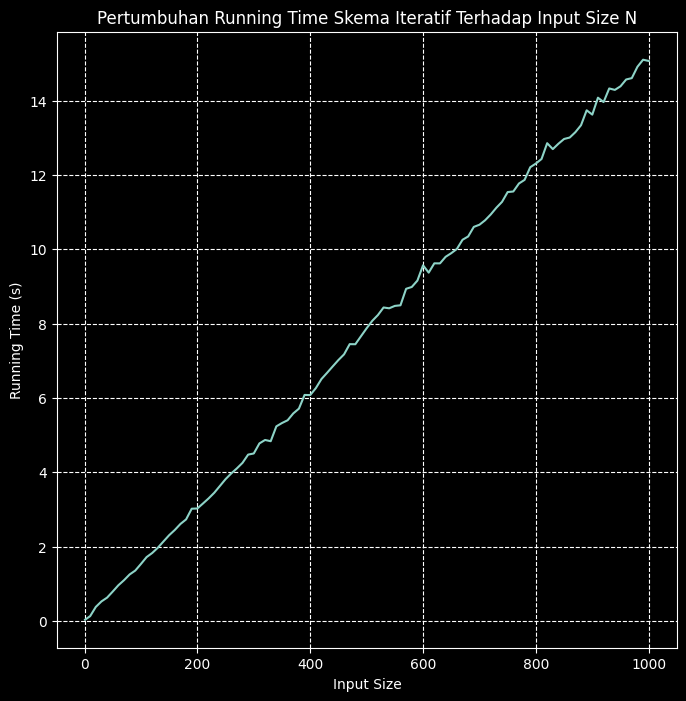

In [14]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,8))
    plt.plot(running_times_df['Iteratif'])
    plt.title("Pertumbuhan Running Time Skema Iteratif Terhadap Input Size N")
    plt.ylabel('Running Time (s)')
    plt.xlabel('Input Size')
    plt.grid(linestyle='--')
    plt.show()

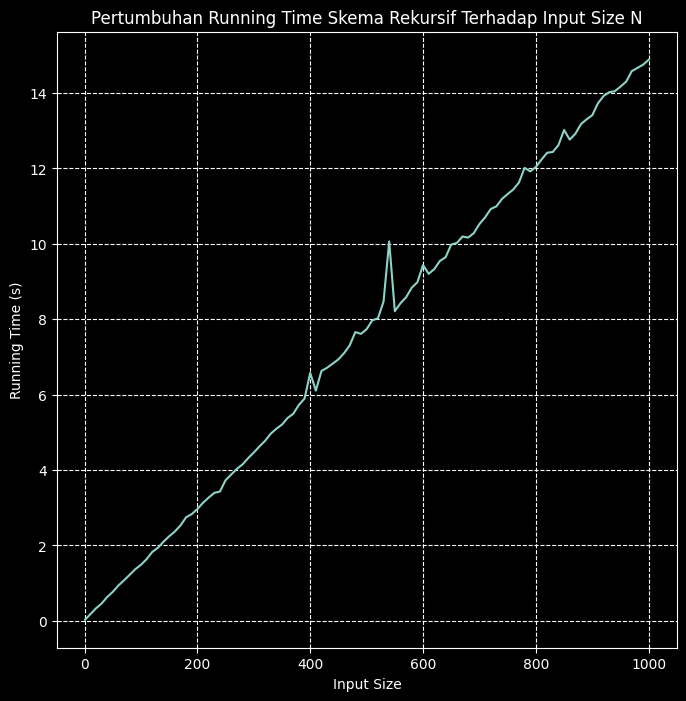

In [15]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,8))
    plt.plot(running_times_df['Rekursif'])
    plt.title("Pertumbuhan Running Time Skema Rekursif Terhadap Input Size N")
    plt.ylabel('Running Time (s)')
    plt.xlabel('Input Size')
    plt.grid(linestyle='--')
    plt.show()

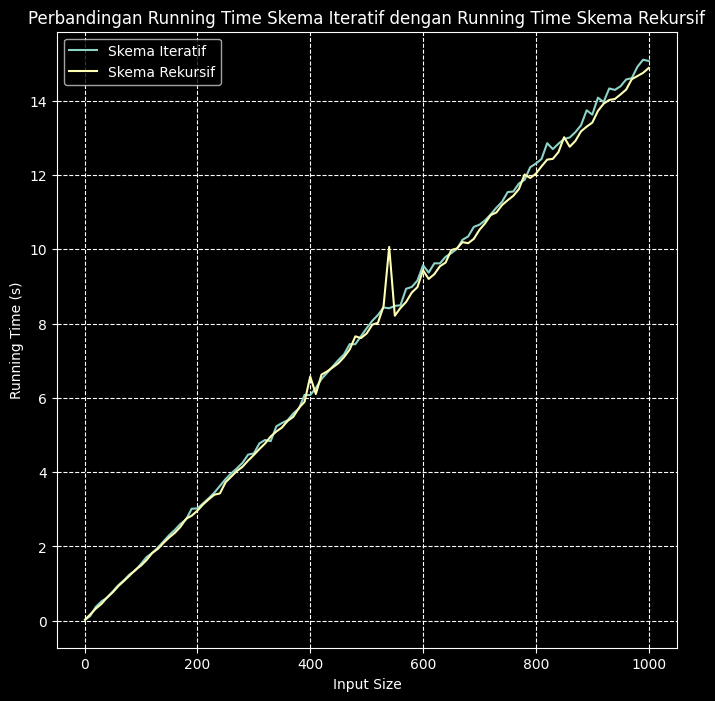

In [16]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8,8))
    plt.plot(N,running_times_df['Iteratif'])
    plt.plot(N,running_times_df['Rekursif'])
    plt.title("Perbandingan Running Time Skema Iteratif dengan Running Time Skema Rekursif")
    plt.legend(['Skema Iteratif','Skema Rekursif'])
    plt.ylabel('Running Time (s)')
    plt.xlabel('Input Size')
    plt.grid(linestyle='--')
    plt.show()

In [17]:
Running_Times_iteratif.reshape(1,101)

array([[ 0.02977467,  0.13344693,  0.32362509,  0.50989366,  0.67025185,
         0.79644036,  0.97158742,  1.15896058,  1.26767969,  1.42477345,
         1.66641998,  1.75525928,  1.90126824,  2.0533824 ,  2.31646156,
         2.33952022,  2.50005627,  2.65450692,  2.78107858,  2.98127222,
         3.1186862 ,  3.29660964,  3.39174795,  3.59023881,  3.69879079,
         3.88269591,  4.13261628,  4.20524073,  4.38102317,  4.55070138,
         4.68690467,  4.88856459,  5.07747364,  5.22380853,  5.35991168,
         5.51239634,  5.61371112,  5.83047867,  5.93246078,  6.10328555,
         6.21833658,  6.45907331,  6.54991436,  6.74988985,  6.88557649,
         7.02825689,  7.1593442 ,  7.45658493,  7.48277187,  7.76189804,
         7.85277057,  7.97989726,  8.36024213,  8.23176956,  8.38349104,
         8.61421371,  8.89525342,  8.89940643,  9.07326317,  9.26637173,
         9.49884748,  9.5932982 ,  9.59321737,  9.83070588,  9.98500848,
        10.21423483, 10.24651909, 10.446661  , 10.6

In [18]:
pd.Series(Running_Times_iteratif)

0       0.029775
1       0.133447
2       0.323625
3       0.509894
4       0.670252
         ...    
96     14.973940
97     15.321412
98     15.323848
99     15.418240
100    15.726832
Length: 101, dtype: float64

In [19]:
N

array([   1,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100,
        110,  120,  130,  140,  150,  160,  170,  180,  190,  200,  210,
        220,  230,  240,  250,  260,  270,  280,  290,  300,  310,  320,
        330,  340,  350,  360,  370,  380,  390,  400,  410,  420,  430,
        440,  450,  460,  470,  480,  490,  500,  510,  520,  530,  540,
        550,  560,  570,  580,  590,  600,  610,  620,  630,  640,  650,
        660,  670,  680,  690,  700,  710,  720,  730,  740,  750,  760,
        770,  780,  790,  800,  810,  820,  830,  840,  850,  860,  870,
        880,  890,  900,  910,  920,  930,  940,  950,  960,  970,  980,
        990, 1000])

In [23]:
running_times_df

,N,Iteratif,Rekursif
N,,,
1,1,0.029372,0.028682
10,10,0.126023,0.169668
20,20,0.373903,0.326899
30,30,0.521995,0.453861
40,40,0.624129,0.627913
...,...,...,...
960,960,14.572582,14.300274
970,970,14.609335,14.580033
980,980,14.914814,14.665503
